# Time series analysis in the MTA turnstile data


## Introduction

The main objective of this work is to analyze MTA turnstile data in order to find outliers, trends and periodicity in it.

In [198]:
import numpy as np
import pandas as pd
import os
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt


In [6]:
#download data
url = 'https://github.com/fedhere/PUI2016_fb55/raw/master/HW9_fb55/MTA_Fare.npy'
os.system('wget ' + url)
os.system("mv " + 'MTA_Fare.npy ' + os.getenv("PUIDATA"))


0

In [2]:
#load rawData
rawData = np.load(os.getenv("PUIDATA") + '/MTA_Fare.npy')


In [3]:
#change nas
data = np.where(rawData == -1, np.nan, rawData)

# Part I - Identifying the most prominent event in the series for all the statoins and card types


In [18]:
#stationsMean = np.nanmean(data,axis=0)
#axis 1 is cards
stationsMean = np.nanmean(data,axis=0)
allMeans = np.nanmean(stationsMean,axis=0)


In [103]:
#weeks 05/21/2010 to 02/21/2014.
import datetime

start = datetime.datetime.strptime("05/21/2010","%m/%d/%Y")
end = datetime.datetime.strptime("02/21/2014", "%m/%d/%Y")
weeks = []
base = start
for i in range(194):
    weeks.append(base)
    base = base + datetime.timedelta(days=7)
weeks = np.array(weeks)

In [105]:
threshold = allMeans.mean() - 3 * allMeans.std()

()

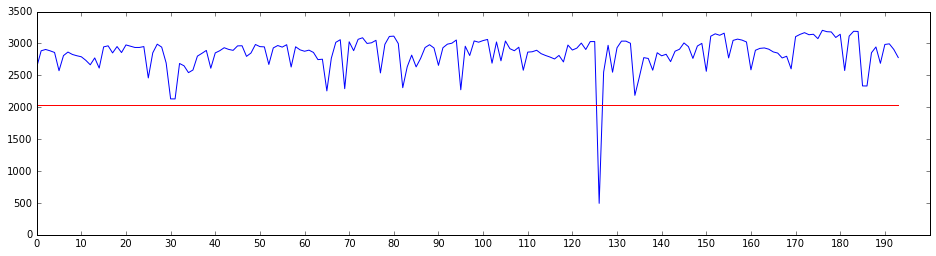

In [106]:
fig = plt.figure(figsize=(16,4))
ax = fig.add_subplot(111)
ax.plot(allMeans)
ax.plot((0, 193), (threshold, threshold), 'r-')
ax.set_xticks(range(0,194,10))
#ax.set_xticklabels(weeks,rotation = 'vertical')
()

In [118]:
print' The event was on %s' % (str(weeks[0]))[:10]

 The event was on 2010-05-21


# Part II - Identifying the ridership types that have steadily increased in popularity, and that have steadily decreased. 

In [122]:
riderMean = np.nanmean(data,axis=0)

In [155]:
ridetype = np.array(['10t', '14d', '1d', '2t', '30d', '7d', 'ada', 'afas', 'exp','ez',
            'ff','mc','mr','month','rfm','rr','sen','spec','tcmc','t',
            'umlim','xbus','stud'])

()

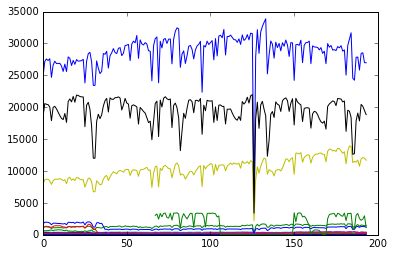

In [152]:
[plt.plot(riderMean[i]) for i in range(riderMean.shape[0])]
()

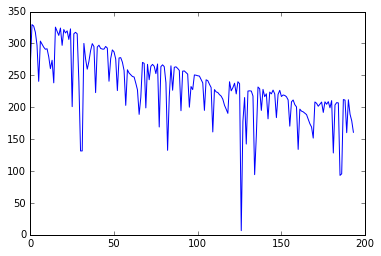

In [159]:
plt.plot(riderMean[13])

In [256]:
def getSlope(riderMeanID):
    series = pd.Series(riderMean[riderMeanID]).rolling(10).mean()
    Y = series[~pd.isnull(series)]
    xAxis = range(len(series[~pd.isnull(series)]))
    X = sm.add_constant(xAxis)
    model = sm.OLS(Y,X).fit()
    print 'Slope %s: %.2f' %(ridetype[riderMeanID],model.params[1]) 
    print 'Corr %s: %.2f' %(ridetype[riderMeanID],np.corrcoef(xAxis,Y)[0,1] * 100) 
    fig = plt.figure(figsize=(16,4))
    ax = fig.add_subplot(111)
    ax.plot(series)
    ax.plot([9,193],[model.params[0],model.params[0] + 193*model.params[1]],'r-')
    #ax.plot([xAxis[0],xAxis[len(xAxis)]],[model.params[0],model.params[0] + xAxis[len(xAxis)]*model.params[1]],'r-')
    plt.show()


Slope 10t: 10.78
Corr 10t: 47.37


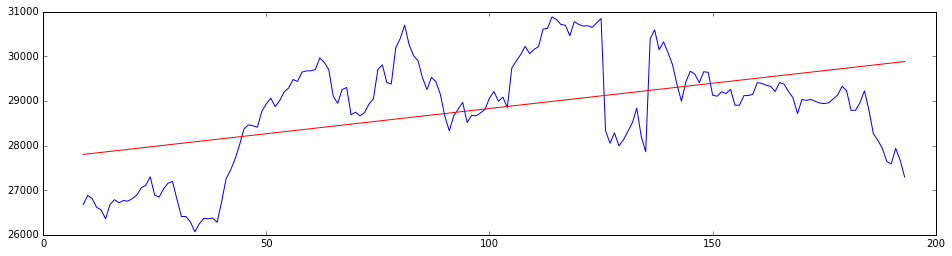

Slope 14d: 2.46
Corr 14d: 91.15


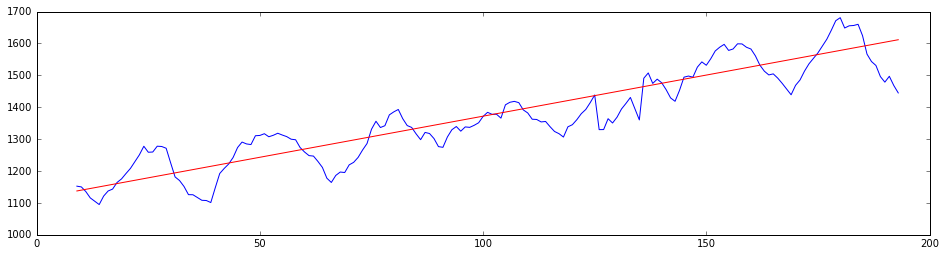

Slope 1d: 0.09
Corr 1d: 37.65


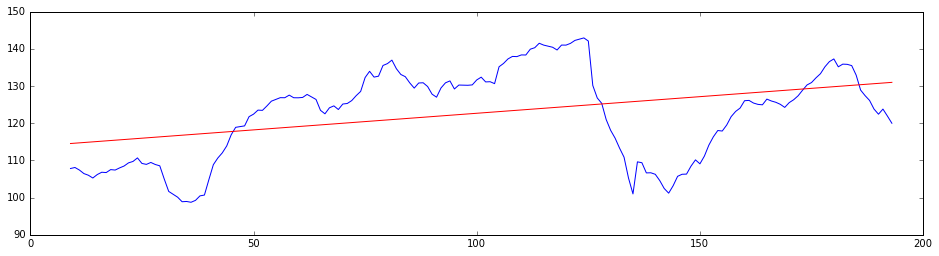

Slope 2t: -0.04
Corr 2t: -11.81


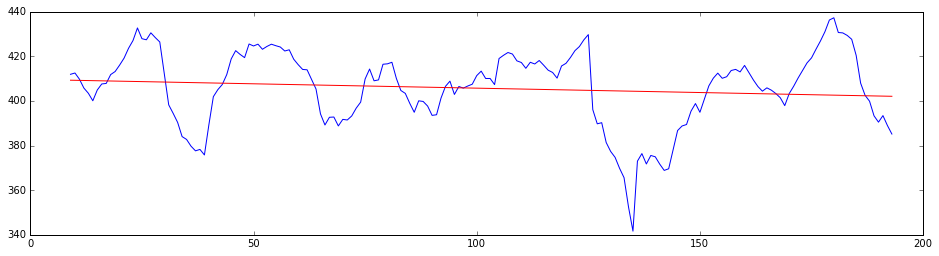

Slope 30d: 0.04
Corr 30d: 28.40


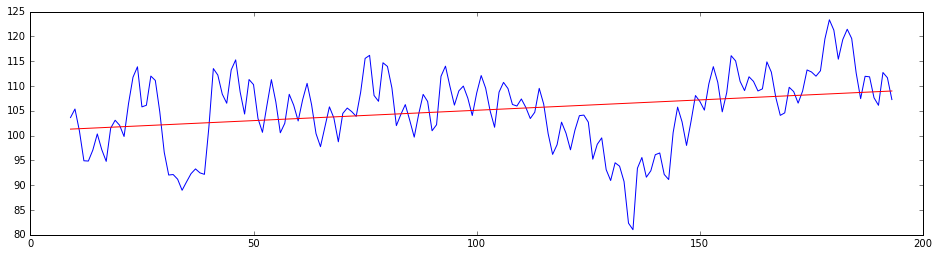

Slope 7d: 23.43
Corr 7d: 91.26


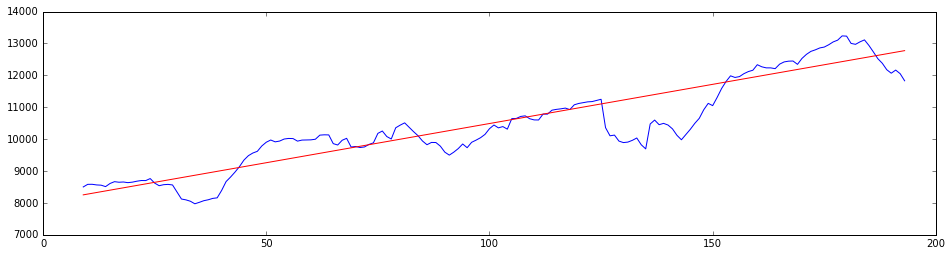

Slope ada: -3.75
Corr ada: -20.28


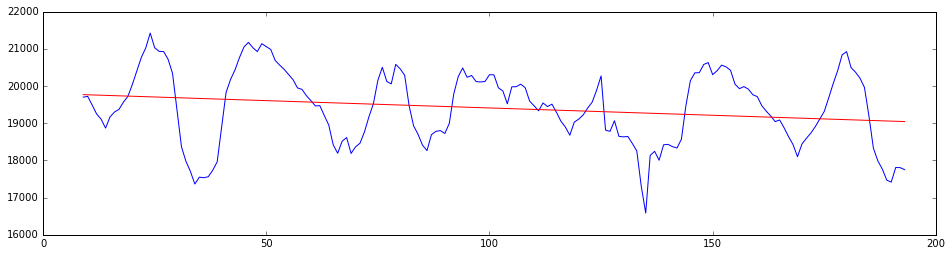

Slope afas: -0.10
Corr afas: -65.46


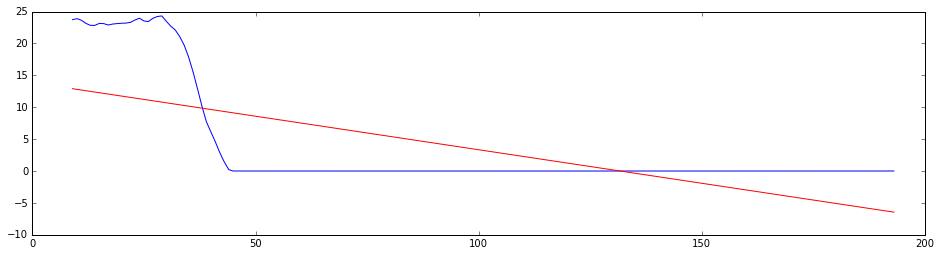

Slope exp: -2.60
Corr exp: -63.53


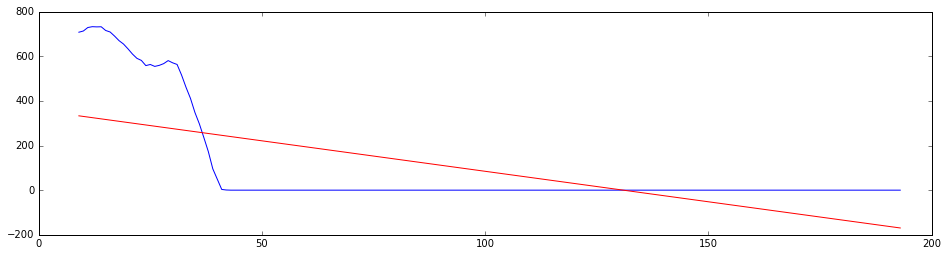

Slope ez: -5.35
Corr ez: -64.21


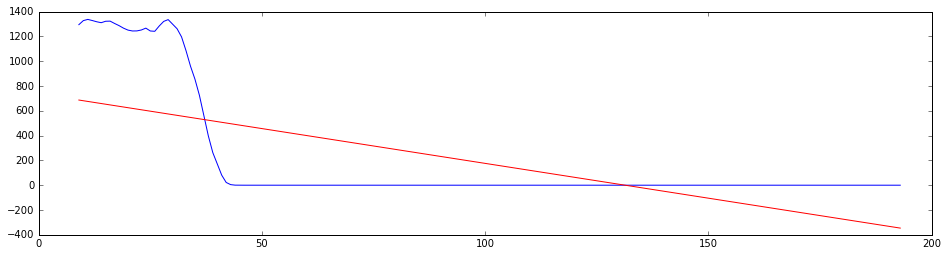

Slope ff: -0.13
Corr ff: -16.57


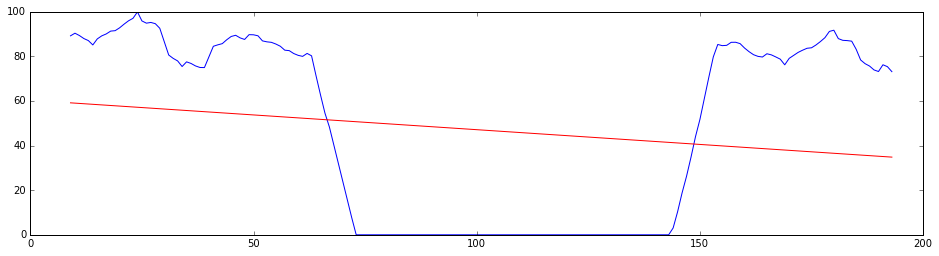

Slope mc: 0.28
Corr mc: 27.75


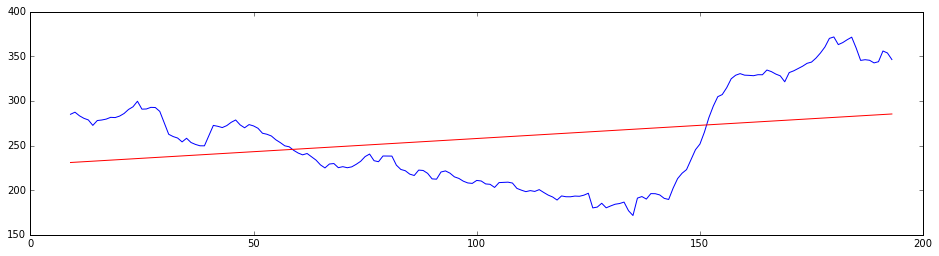

Slope mr: 1.89
Corr mr: 76.15


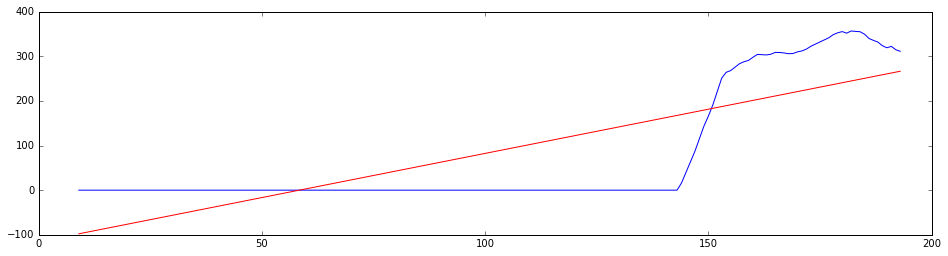

Slope month: -0.64
Corr month: -93.55


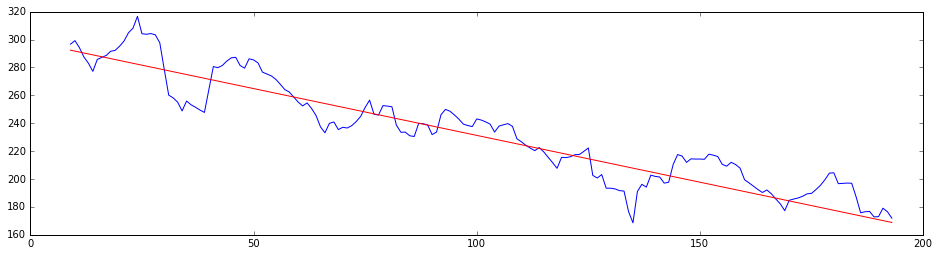

Slope rfm: -2.38
Corr rfm: -38.75


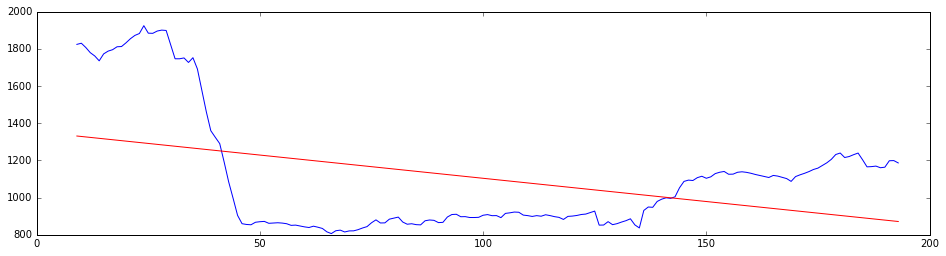

Slope rr: 1.34
Corr rr: 98.33


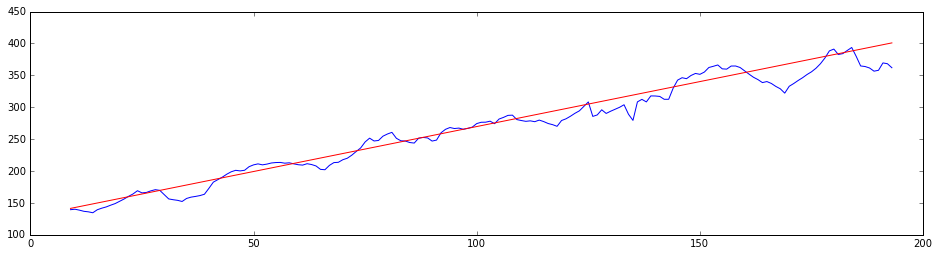

Slope sen: 0.73
Corr sen: 98.26


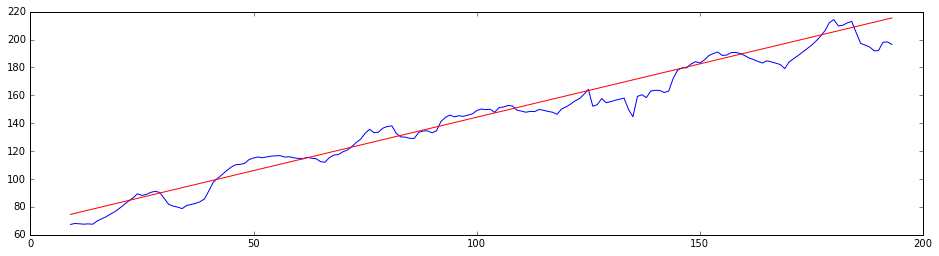

Slope spec: 0.32
Corr spec: 77.05


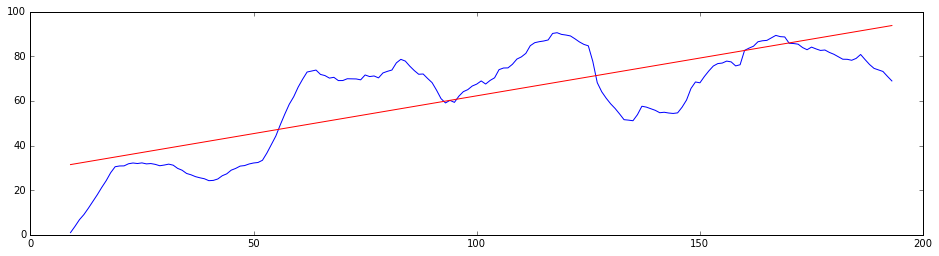

Slope tcmc: 1.02
Corr tcmc: 82.05


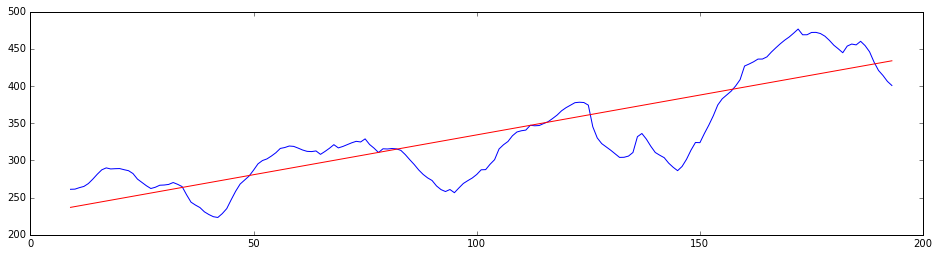

Slope t: 0.01
Corr t: 16.14


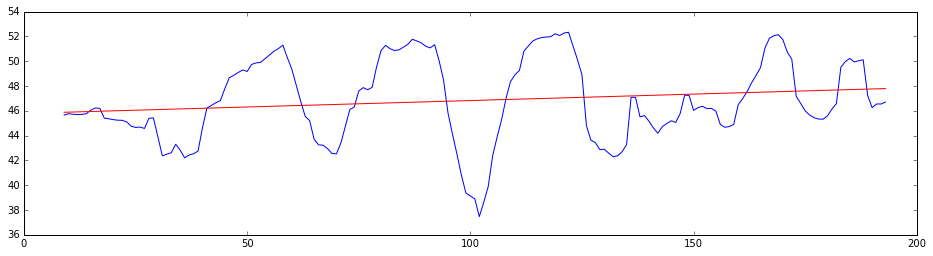

Slope umlim: 0.00
Corr umlim: 3.64


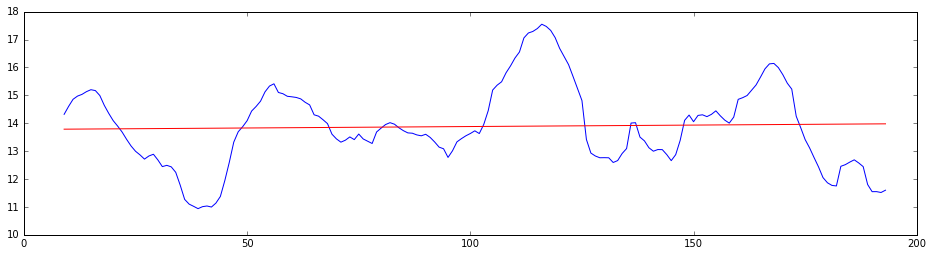

Slope xbus: 0.01
Corr xbus: 83.25


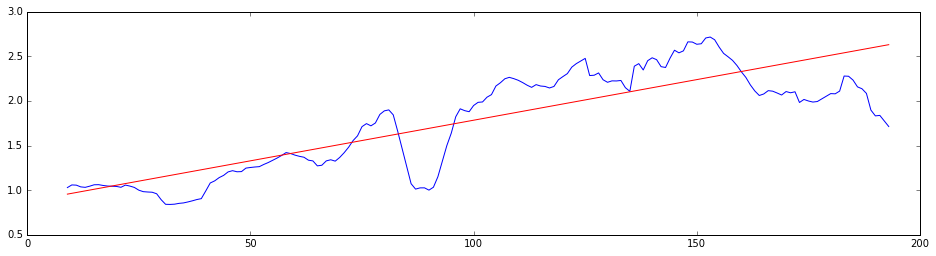

Slope stud: -5.37
Corr stud: -14.40


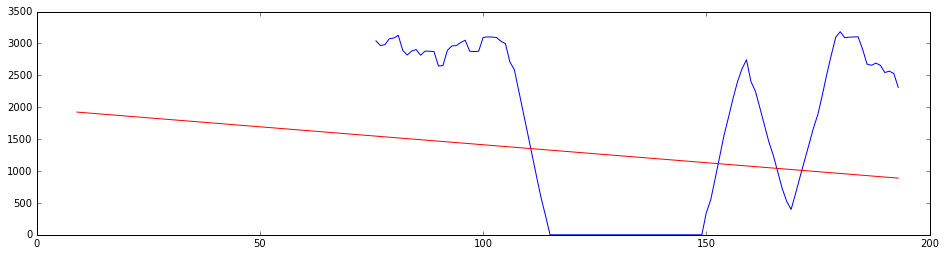

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [257]:
[getSlope(x) for x in range(23)]

Slope rr: 1.34
Corr rr: 98.33


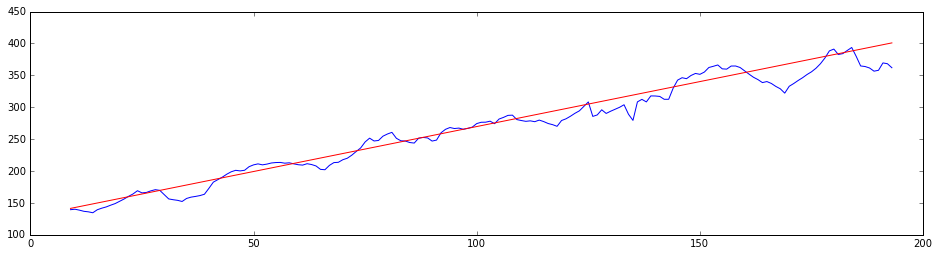

In [261]:
#Higest rr 15 o sen 16
getSlope(15)

Slope month: -0.64
Corr month: -93


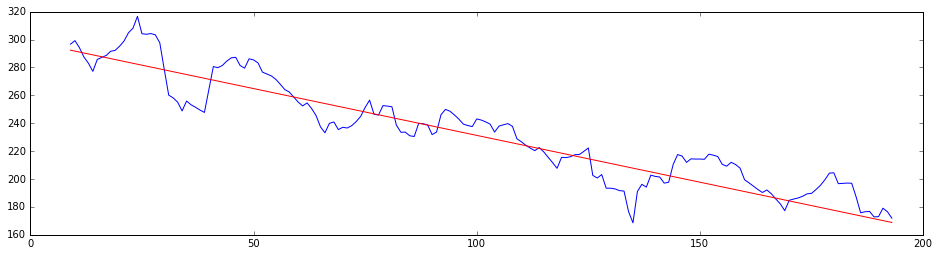

In [255]:
#lowest month
getSlope(13)

In [239]:
riderMeanID = 21
series = pd.Series(riderMean[riderMeanID]).rolling(10).mean()
Y = series[~pd.isnull(series)]
xAxis = range(len(series[~pd.isnull(series)]))
X = sm.add_constant(xAxis)
model = sm.OLS(Y,X).fit()
print model.summary()

print 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     413.1
Date:                Thu, 10 Nov 2016   Prob (F-statistic):           8.30e-49
Time:                        17:09:08   Log-Likelihood:                -44.804
No. Observations:                 185   AIC:                             93.61
Df Residuals:                     183   BIC:                             100.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.9555      0.045     21.050      0.0